## Анализ поведения клиентов сервиса  Яндекс.Афиша
#### Разделим наше исследование на несколько шагов:
Шаг 1. Загрузка данных и подготовка их к анализу

Шаг 2. Построение отчетов и подсчёт метрик

Шаг 3. Написание вывода и рекомендаций маркетологам

#### Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
visits = pd.read_csv('C:\\datasets\\visits_log.csv')
orders = pd.read_csv('C:\\datasets\\orders_log.csv')
costs = pd.read_csv('C:\\datasets\\costs.csv')

Посмотрим на таблицу visits

In [2]:
display(visits.head())
visits.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Мы видим что данные в колонках End Ts и Start Ts имеют ошибочный тип. Приведем их в верному типу.

In [3]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
#visits.info()

Проверим таблицу orders

In [4]:
display(orders.head())
orders.info()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Здесь также нужно поменять тип данных в колонке с датами

In [5]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

Взгляним на 3ю таблицу

In [6]:
display(costs.head())
costs.info()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Здесь та же проблема, колонка с датами требует замены типа

In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])

#### Шаг 2. Построим отчеты и посчитаем метрики

Посчитаем сколько людей пользуются сервисом Яндекс.Афиша

In [8]:
print(visits['Start Ts'].min())
print(visits['Start Ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


У нас есть данные ровно за 1 год. Посчитаем количество уникальных пользователей за это время.

In [9]:
print('Пользователей в год', visits['Uid'].nunique())

Пользователей в год 228169


Посчитаем среднее колличество уникальных пользователей в месяц, неделю и день:

In [17]:
visits['month'] = visits['Start Ts'].astype('datetime64[M]')
visits['week'] = visits['Start Ts'].dt.week
visits['day'] = visits['Start Ts'].dt.date

user_per_month = visits.groupby('month')['Uid'].nunique()
print('Пользователей в месяц(mau):{:.0f}'.format(user_per_month.mean()))

user_per_week = visits.groupby('week')['Uid'].nunique()
print('Пользователей в неделю(wau):{:.0f}'.format(user_per_week.mean()))

user_per_day = visits.groupby('day')['Uid'].nunique()
print('Пользователей в день(dau):{:.0f}'.format(user_per_day.mean()))


Пользователей в месяц(mau):23228
Пользователей в неделю(wau):5825
Пользователей в день(dau):908


Построим график изменения количества пользователей в неделю:

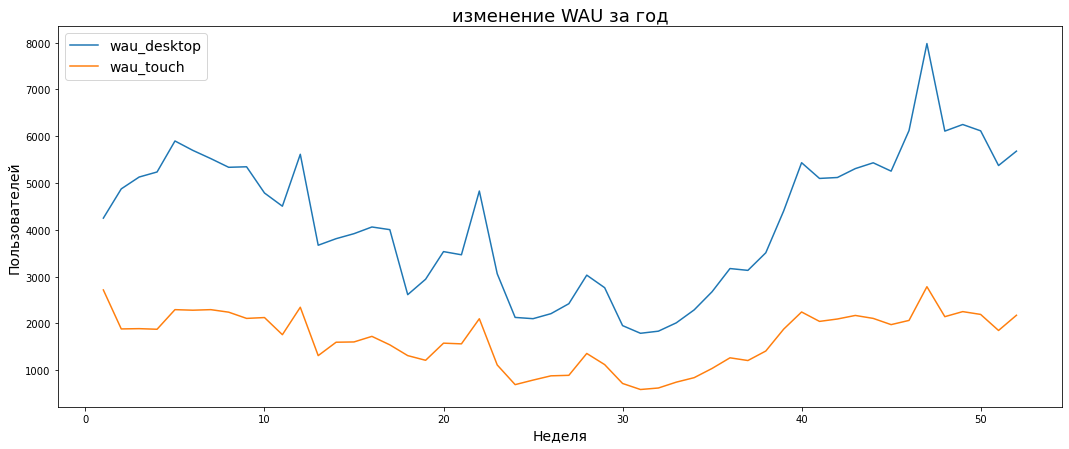

In [18]:
# разделим данные на 2 группы по используемому устройству:
desktop_visits = visits.query('Device == "desktop"')
touch_visits = visits.query('Device == "touch"')

# посчитаем wau по используемому устройству:
wau_desktop = desktop_visits.groupby('week')['Uid'].nunique()
wau_touch = touch_visits.groupby('week')['Uid'].nunique()

# построим графики
plt.figure(figsize=(18,7))
plt.plot(wau_desktop, label='wau_desktop')
plt.plot(wau_touch, label='wau_touch')
plt.title('изменение WAU за год', fontsize=18)
plt.xlabel('Неделя', fontsize=14)
plt.ylabel('Пользователей', fontsize=14)
plt.legend(loc=2, fontsize=14);

Посчитаем среднее количество сессий в день:

In [20]:
sessions_per_day = visits.groupby('day')['day'].count().mean()
print('Сессий в день:{:.2f}'.format(sessions_per_day))

Сессий в день:987.36


Посмотрим на распределение длительности сессий на разных устройствах:


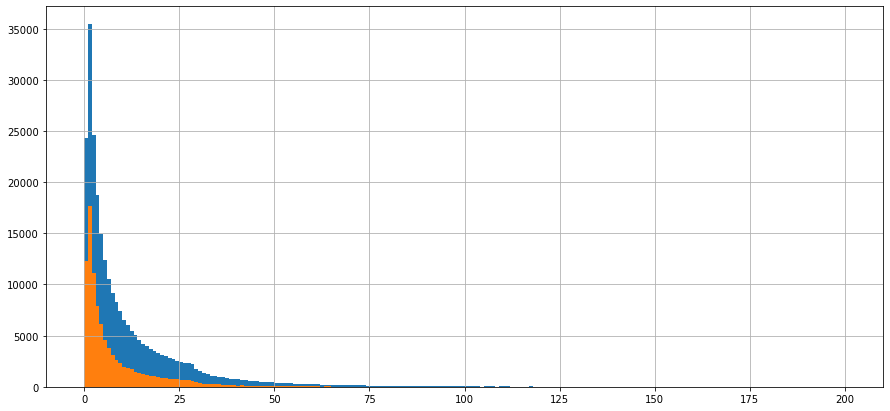

In [21]:

visits['session_time'] = (visits['End Ts'] - visits['Start Ts']).astype('timedelta64[m]')

desktop_visits['session_time'] = (desktop_visits['End Ts'] - desktop_visits['Start Ts']).astype('timedelta64[m]')
desktop_visits['session_time'].hist(figsize=(15,7), range=(0,200), bins=200);

touch_visits['session_time'] = (touch_visits['End Ts'] - touch_visits['Start Ts']).astype('timedelta64[m]')
touch_visits['session_time'].hist(figsize=(15,7), range=(0,200), bins=200);


Из гистограммы распределения мы видим,что пользователи копьютеров проводят времени на сайте примерно вдвое больше, чем пользователи мобильных устройств. Но при этом распределение выглядит одинаково, и оно отлично от нормального. В данном случае правильнее будет использовать медианное время сессии:

In [22]:
median_session_time = visits['session_time'].median()
median_desktop_session_time = desktop_visits['session_time'].median()
median_touch_session_time = touch_visits['session_time'].median()
print('Медианное время сессии составляет:', median_session_time)
print('Медианное время сессии с компьютера составляет:', median_desktop_session_time)
print('Медианное время сессии c мобильного устройства составляет:', median_touch_session_time)

Медианное время сессии составляет: 5.0
Медианное время сессии с компьютера составляет: 6.0
Медианное время сессии c мобильного устройства составляет: 3.0


Посчитаем, как часто пользователи возвращаются

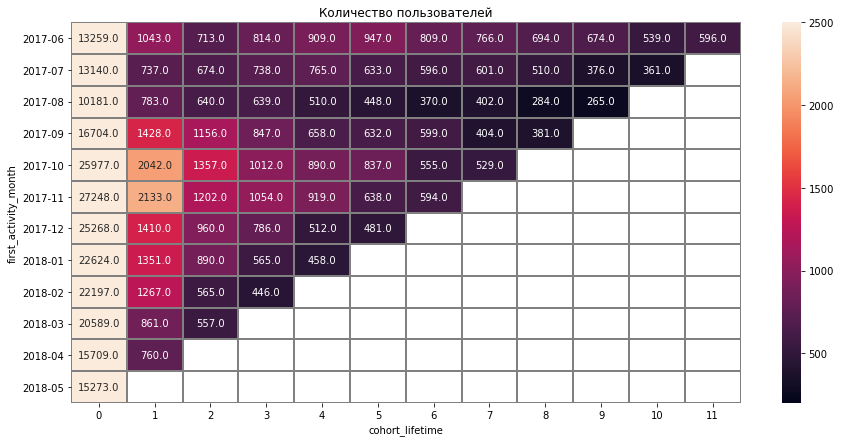

In [24]:
first_activity_date = visits.groupby('Uid')['Start Ts'].min()

first_activity_date.name = 'first_activity_date'
first_activity_date = first_activity_date.reset_index()
cohort_visits = visits.merge(first_activity_date, how='outer', on='Uid')

cohort_visits['first_activity_month'] = cohort_visits['first_activity_date'].astype('datetime64[M]')
cohort_grouped = cohort_visits.groupby(['first_activity_month', 'month'])['Uid'].nunique()

cohort_grouped = cohort_grouped.reset_index()
cohort_grouped['cohort_lifetime'] = cohort_grouped['month'] - cohort_grouped['first_activity_month']
cohort_grouped['cohort_lifetime'] = cohort_grouped['cohort_lifetime'] / np.timedelta64(1,'M')
cohort_grouped['cohort_lifetime'] = cohort_grouped['cohort_lifetime'].round().astype(int)

cohort_grouped['first_activity_month'] = cohort_grouped['first_activity_month'].dt.strftime('%Y-%m')
cohort_grouped['month'] = cohort_grouped['month'].dt.strftime('%Y-%m')

pivot_cohort_grouped = cohort_grouped.pivot(
index='first_activity_month',
columns='cohort_lifetime',
values='Uid')
#display(pivot_cohort_grouped)

plt.figure(figsize=(15, 7))
plt.title('Количество пользователей')
sns.heatmap(pivot_cohort_grouped, annot=True, fmt='.1f', linewidths=1, vmin=200, vmax=2500, linecolor='gray'); 

Постоим такую же тепловую карту с процентным колличеством пользователей от первоначального колличества

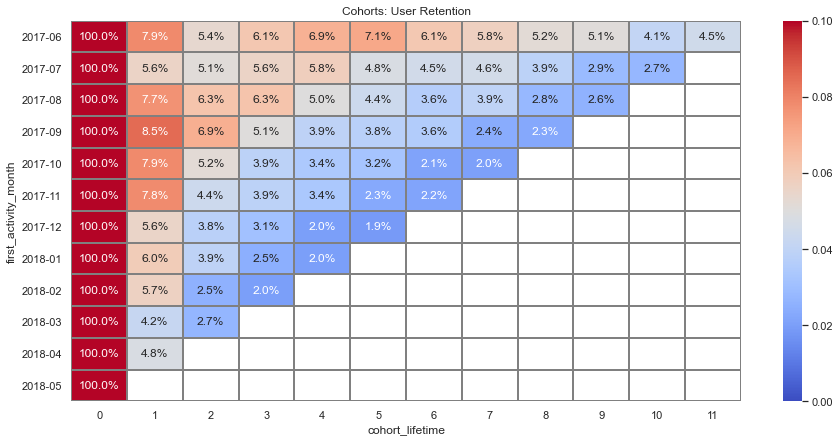

In [26]:
#display(pivot_cohort_grouped)
cohort_grouped = cohort_grouped.reset_index()
full_cohort = cohort_grouped[cohort_grouped['cohort_lifetime'] == 0][['first_activity_month','Uid']]
full_cohort = full_cohort.rename(columns={'Uid':'cohort_users'})
new_cohort_grouped = cohort_grouped.merge(full_cohort, on= 'first_activity_month')
new_cohort_grouped['retention'] = new_cohort_grouped['Uid']/new_cohort_grouped['cohort_users']
#print(full_cohort)
retention_pivot = new_cohort_grouped.pivot(
index='first_activity_month',
columns='cohort_lifetime',
values = 'retention')

sns.set(style='white')
plt.figure(figsize=(15, 7))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0, vmax=0.1, cmap='coolwarm');

Из построенной тепловой карты хорошо видно, что в следующий месяц после начала пользования сервисом возвращается не более 8.5% пользователей. Последующие месяцы количество активных пользователей когорты продолжает сокращаться, но уже гораздо медленее.

##### Когда же люди начинают покупать продукт?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Uid                  36523 non-null  uint64         
 1   first_order          36523 non-null  datetime64[ns] 
 2   first_activity_date  36523 non-null  datetime64[ns] 
 3   time_to_order        36523 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1), uint64(1)
memory usage: 1.4 MB


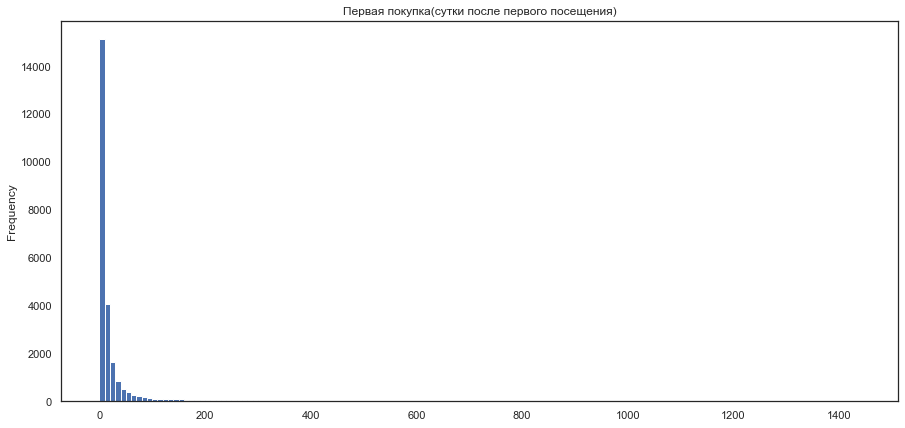

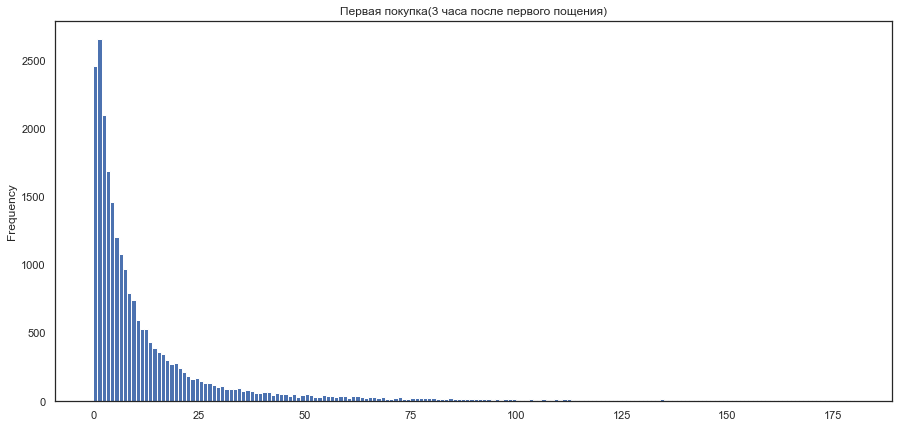

In [29]:
#print(first_activity_date)
first_orders = orders.groupby('Uid')['Buy Ts'].min()
first_orders.name = 'first_order'
first_orders = first_orders.reset_index()
#print(first_orders)
first_orders = first_orders.merge(first_activity_date, on = 'Uid') 
first_orders['time_to_order'] = first_orders['first_order'] - first_orders['first_activity_date']
#print(first_orders)
first_orders.info()

#first_orders.plot(kind='hist', y='time_to_order', histtype='step', bins=100,
                             # linewidth=5, alpha=0.7, label='raw')

(first_orders['time_to_order'].astype('timedelta64[m]')).plot.hist(bins=144, figsize=(15,7), range=(0,1440), title='Первая покупка(сутки после первого посещения)') 
plt.show();
(first_orders['time_to_order'].astype('timedelta64[m]')).plot.hist(bins=180, figsize=(15,7), range=(0,180), title='Первая покупка(3 часа после первого пощения)');    
#print(first_orders['time_to_order'].head(15))

Из этих гистограмм мы видим, что люди начинают делать покупки сразу. Большинство первых покупок сделаны в первые минуты пользования сервисом. Дальше вероятность покупки падает. Если же пользователь не сделал свой заказ в первые 2 часа пользования, вероятность того, что он совершит покупку минимальна.

In [30]:
orders['month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_order_date'] = orders['Buy Ts'].dt.date
display(orders)

print('Среднее число заказов пользователя в месяц: ', orders.groupby(['Uid','month']).agg({'Revenue':'count'}).mean())

,Buy Ts,Revenue,Uid,month,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31


Среднее число заказов пользователя в месяц:  Revenue    1.229065
dtype: float64


In [31]:
print('Средний чек покупки состовляет: {:.2f}'.format(orders['Revenue'].mean()))

Средний чек покупки состовляет: 5.00


#### Посчитаем LTV
Получим месяц первой покупки каждого покупателя

In [32]:
first_orders = orders.groupby('Uid').agg({'month': 'min', 'first_order_date': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month', 'first_order_date']
print(first_orders.head())


                Uid first_order_month first_order_date
0   313578113262317        2018-01-01       2018-01-03
1  1575281904278712        2017-06-01       2017-06-03
2  2429014661409475        2017-10-01       2017-10-11
3  2464366381792757        2018-01-01       2018-01-28
4  2551852515556206        2017-11-01       2017-11-24


Посчитаем количество новых покупателей за каждый месяц.

In [33]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes) 

   first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988
12        2018-06-01         1


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [34]:
orders_new = pd.merge(orders,first_orders, on='Uid')
print(orders_new.head()) 


               Buy Ts  Revenue                   Uid      month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

  first_order_date_x first_order_month first_order_date_y  
0         2017-06-01        2017-06-01         2017-06-01  
1         2017-06-01        2017-06-01         2017-06-01  
2         2017-06-01        2017-06-01         2017-06-01  
3         2017-06-01        2017-06-01         2017-06-01  
4         2017-06-01        2017-06-01         2017-06-01  


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [35]:
cohorts = orders_new.groupby(['first_order_month','month']).agg({'Revenue': 'sum'}).reset_index()
print(cohorts.head()) 

  first_order_month      month  Revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58


 Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [36]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head()) 

  first_order_month  n_buyers      month  Revenue
0        2017-06-01      2023 2017-06-01  9557.49
1        2017-06-01      2023 2017-07-01   981.82
2        2017-06-01      2023 2017-08-01   885.34
3        2017-06-01      2023 2017-09-01  1931.30
4        2017-06-01      2023 2017-10-01  2068.58


In [37]:
margin_rate = 1
    
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head()) 

  first_order_month  n_buyers      month  Revenue       gp  age
0        2017-06-01      2023 2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023 2017-07-01   981.82   981.82    1
2        2017-06-01      2023 2017-08-01   885.34   885.34    2
3        2017-06-01      2023 2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023 2017-10-01  2068.58  2068.58    4


Наконец, найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.

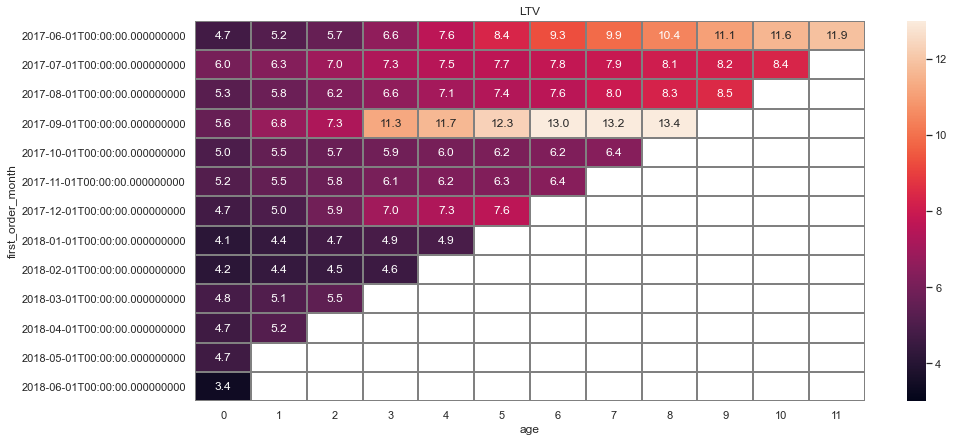

In [38]:
report['ltv'] = report['gp'] / report['n_buyers']
    
LTV = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(2)
    
LTV.fillna('') 

plt.figure(figsize=(15, 7))
plt.title('LTV')
sns.heatmap(LTV, annot=True, fmt='.1f', linewidths=1, vmin=3, vmax=13, linecolor='gray'); 

Из тепловой карты хорошо видно, что пользователи 1 и 4 когорт приносят денег больше остальных Так же видно, что пользователи из всех когорт хорошо покупают только в первый месяц, начиная со 2-ого месяца индекс LTV падает в несколько раз и во всех кагортах, за исключением 4, постоянно изменяясь остается на стабильно низком уровне.

Узнаем сколько в среднем принес выручки каждый покупатель из первой когорты, для этого посчитаем итоговый LTV первой когорты. Сложим LTV за весь период:

In [39]:
ltv_2017_06 = LTV.loc['2017-06-01'].sum()
print(ltv_2017_06) 

102.36


##### Посчитаем CAC этой когорты. 
Поделим расходы за этот месяц на количество людей в когорте:

In [40]:
# отфильруем нужную когорту
cohort_2017_06 = report[report['month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby('month')['costs'].sum()

costs_2017_06 = monthly_costs['2017-06-01']

n_buyers_2017_06 = cohort_2017_06['n_buyers'][0]
cac_2017_06 = costs_2017_06 / n_buyers_2017_06
ltv_2017_06   = LTV.loc['2018-03-01'].sum()

print('CAC =', cac_2017_06)
print('LTV =', ltv_2017_06) 

CAC = 8.905091448344047
LTV = 15.440000000000001


Добавим данные о расходах и посчитаем CAC для всех кагорт:

In [41]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head() 

,first_order_month,n_buyers,month,Revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,18015.0,8.905091


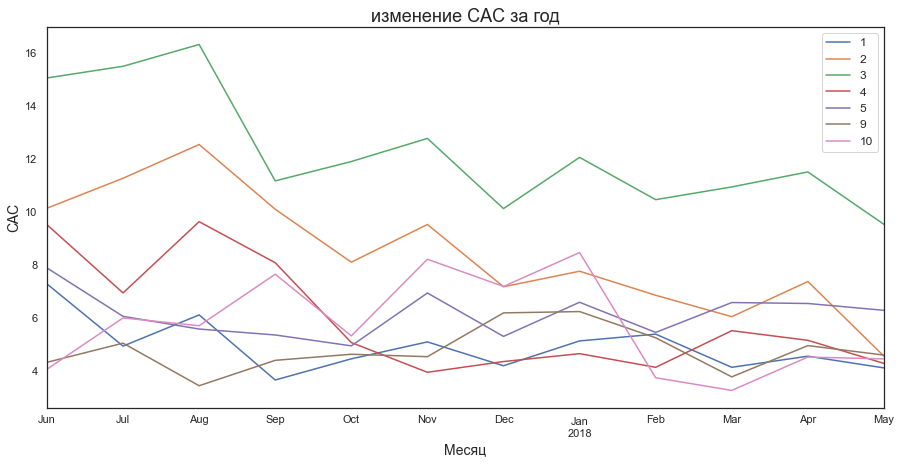

In [42]:
users = visits.sort_values('Start Ts').groupby('Uid').first()
users = users[['Source Id']].reset_index()
users = users.rename(columns={'Source Id': 'source_id'})


new_orders = orders_new.merge(users, on='Uid')
new_orders['dt'] = new_orders['first_order_date_x']

#display(new_orders)
date_source = new_orders.groupby(['dt', 'source_id'])['Uid'].count().reset_index()
date_source['dt'] = pd.to_datetime(date_source['dt'])
#date_source.info()
date_source = date_source.merge(costs, on=['dt', 'source_id'])
date_source = date_source.rename(columns={'Uid': 'users'})
date_source['CAC'] = date_source['costs'] / date_source['users']
#display(date_source.head())
pivot_cac = date_source.pivot_table(
index= 'month',
columns = 'source_id',
values = 'CAC',
aggfunc = 'mean')
#display(pivot_cac.head())

pivot_cac.plot(figsize=(15,7))
plt.title('изменение CAC за год', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('САС', fontsize=14)
plt.legend(loc=1, fontsize=12)

##### Рассчитаем ROMI:

<AxesSubplot:title={'center':'ROMI'}, xlabel='age', ylabel='first_order_month'>

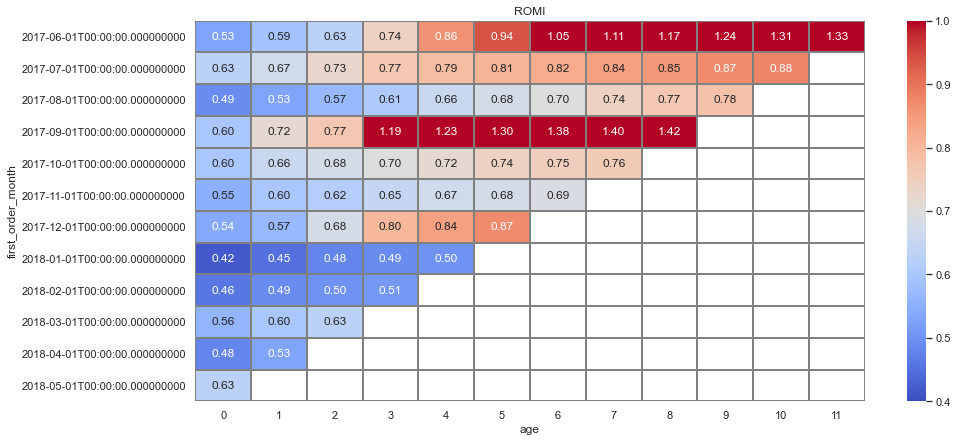

In [43]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
output.cumsum(axis=1).round(2)

plt.figure(figsize=(15, 7))
plt.title('ROMI')
sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, vmin=0.4, vmax=1, linecolor='gray', cmap='coolwarm')

Из этой таблицы можем сделать вывод, что на данный момент окупились лишь две кагорты:
Кагорта "2017-06-01" окупилась на 7-ом месяце и кагорта "2017-09-01" окупилась на 4-ом месяце.

#### Шаг 3 Вывод:

Из проведенного иследования мы видим, что на данный момент окупились всего лишь две когорты, а именно: кагорта "2017-06-01" и кагорта 2017-09-01. По этому можно считать, что маркетинговая стратегия, применявшеяся в отношении пользователей из этих когорт была наиболее эфективной.
Показатель СAC 3 источника привлечения клиентов слишком высокий, затраты на привлечения клиентови из этого источника неоправданно высоки, маркетологам следовало бы отказаться от его исспользования. Показатели 2ого и 4ого источников сильно улучшились в течении года, и они стали более рентабельными.
